# Prediction using Unsupervised ML (Task2)

### Seunghyun Nam

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/Iris.csv")

print(f"First few rows of the dataset: \n{data.head()}")

print(f"\n\nSummary statistics of the dataset: \n{data.describe()}")

First few rows of the dataset: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Summary statistics of the dataset: 
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.5

In [ ]:
# Missing Values
print(f"Missing Values: \n{data.isnull().sum()}")

Missing Values: 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<Figure size 1200x800 with 0 Axes>

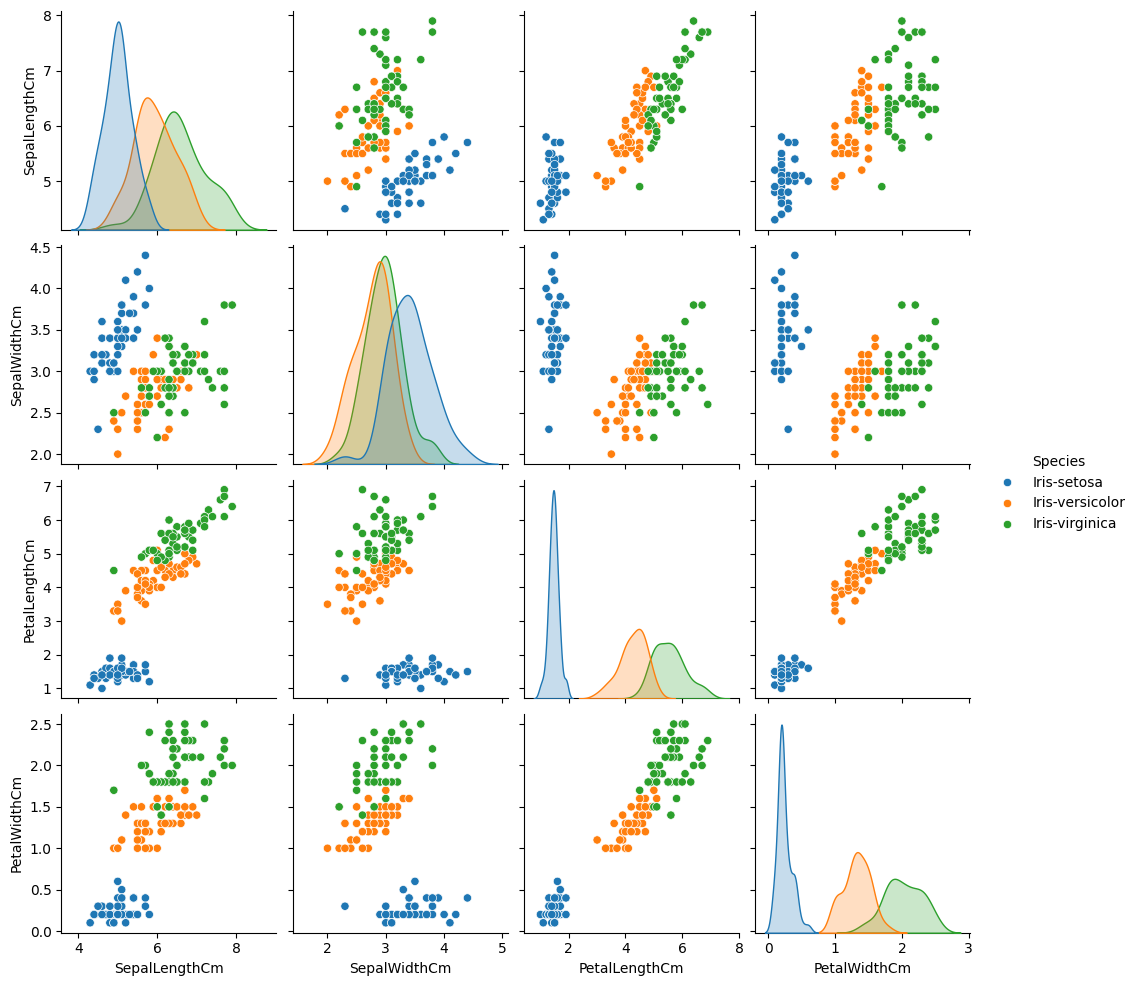

In [ ]:
# Visualize the dataset
plt.figure(figsize = (12, 8))
sns.pairplot(data.drop(columns = ['Id']), hue = 'Species')
plt.show()

Based on the pariplot above:
- Iris-setosa is clearly separable from the other two species, while Iris-versicolor and Iris-virginica show some overlap
- With the diagonal plots, it is shown that Iris-setosa has distinct distribution for petal length and width, while Iris-versicolor and Iris-virginical have more similar distributions for petal measurements.

In [ ]:
# Drop Id and Species columns for clustering
X = data.drop(columns = ['Id', 'Species'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimum num of cluters using the Elbow method
array = []
for i in range(1,101):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
  kmeans.fit(X_scaled)
  array.append(kmeans.inertia_)

In [ ]:
print(array)

[600.0000000000001, 223.73200573676345, 140.96581663074699, 114.38954350297055, 91.00244098567245, 80.24972235577131, 71.80946214715611, 62.641008351188034, 54.25747690371484, 49.958828372190034, 43.7095867612973, 39.36924361162956, 36.62130510833536, 34.72103559770553, 32.32077511745207, 30.201228700458543, 28.988666305106598, 27.02639126539413, 25.608440101733603, 24.58020296307949, 22.939178919293987, 22.25534790517726, 20.916750612191898, 20.33177666250268, 19.608058173586137, 17.89896658871644, 17.304287665807358, 17.384587596900086, 16.434448816049855, 15.59741148636447, 15.230757904517398, 14.803168027843931, 14.296274681944347, 13.832318268320487, 13.240147174315322, 12.952978771038094, 12.42063649419467, 11.62039754364601, 11.402687962944727, 11.385362630980872, 10.84615735873298, 10.20559688067649, 10.134081155726578, 9.795328899470052, 9.251009242582686, 9.143499941615378, 8.860058184619717, 8.547128699068146, 8.37739192247821, 8.141703743370288, 7.630714273092208, 7.5280589

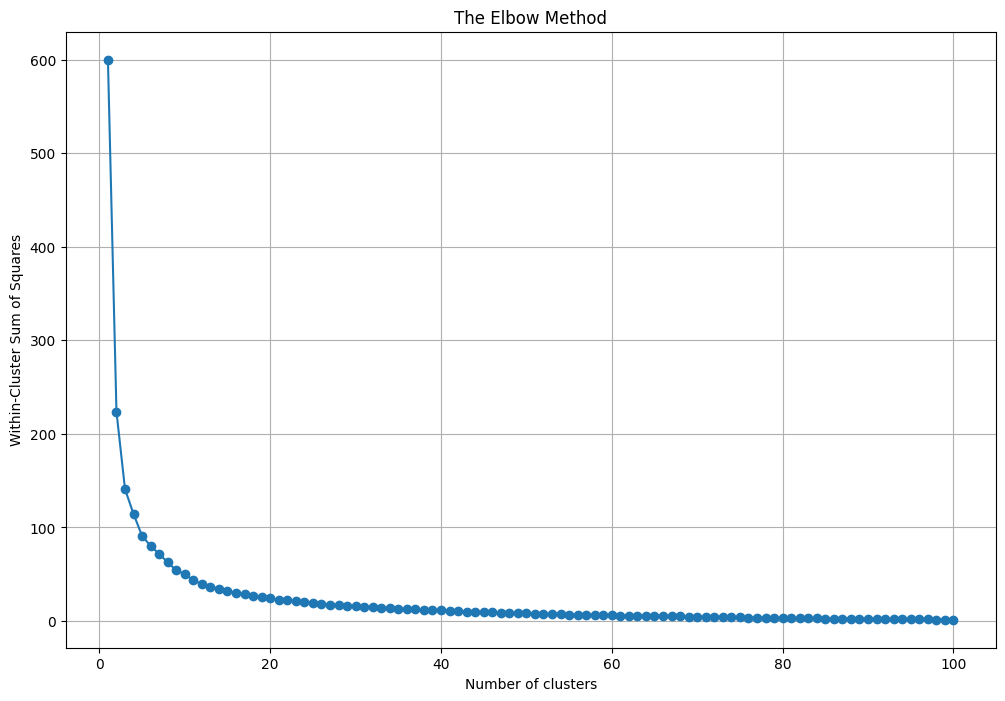

In [ ]:
# Elbow Graph
plt.figure(figsize = (12, 8))
plt.plot(range(1, 101), array, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()

In [ ]:
# Apply k-means clustering (optimum num = 3)
opt_num = 3
kmeans = KMeans(n_clusters = opt_num, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans

display(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


<ipython-input-9-64cd00fef7fd>:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(ax = axes[0], x ='SepalLengthCm', y ='SepalWidthCm', hue = 'Species', data = data, palette = colors, s = 100)
<ipython-input-9-64cd00fef7fd>:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(ax=axes[1], x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = data, palette = colors, s = 100)


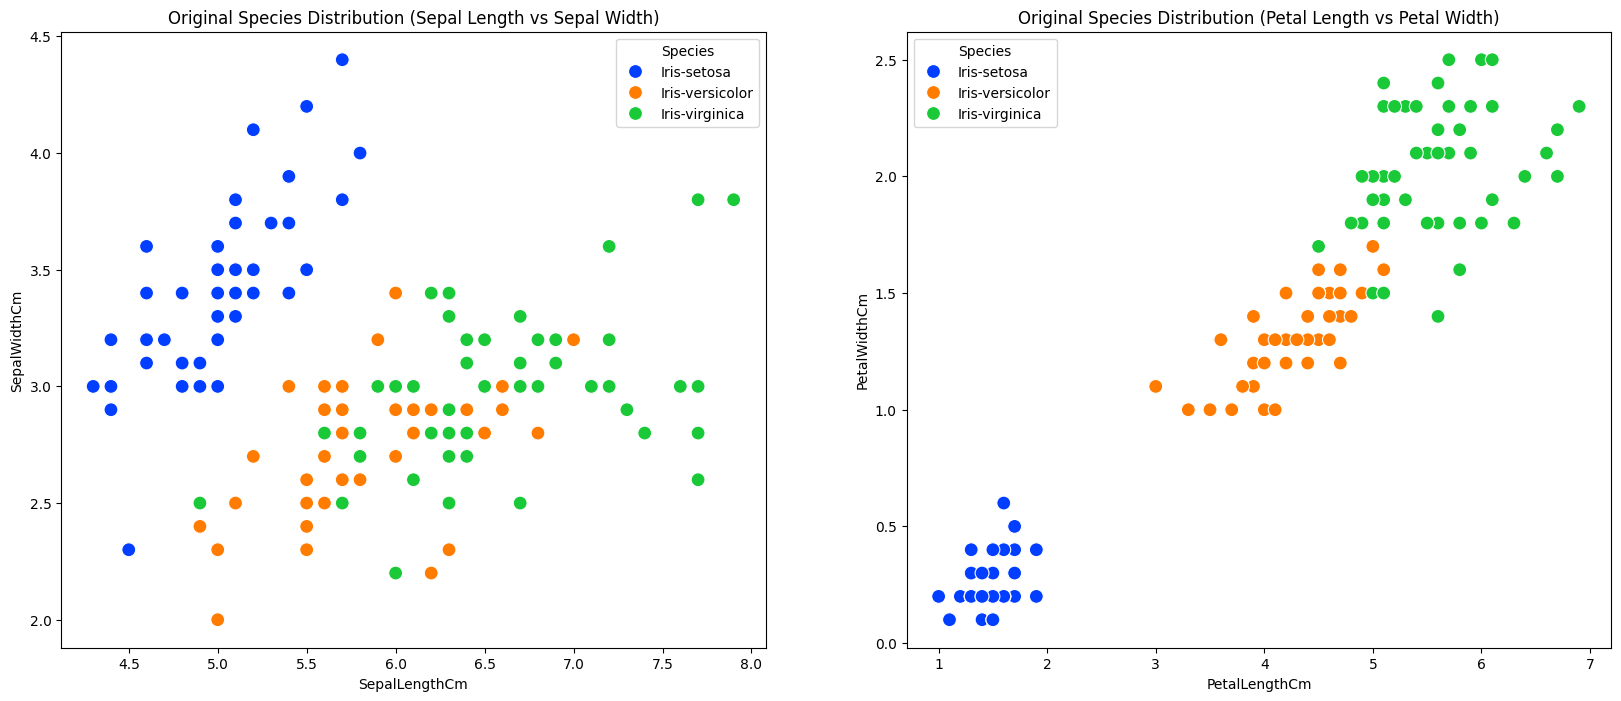

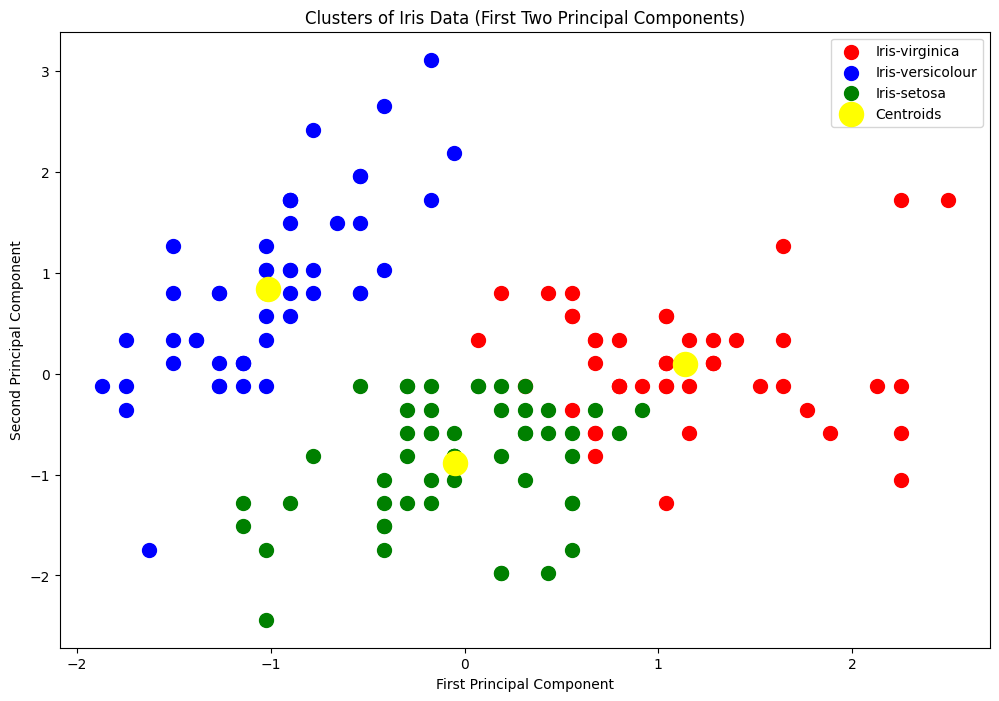

In [ ]:
# Define a more contrasting color palette
colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Visualize the clusters
sns.scatterplot(ax = axes[0], x ='SepalLengthCm', y ='SepalWidthCm', hue = 'Species', data = data, palette = colors, s = 100)
axes[0].set_title('Original Species Distribution (Sepal Length vs Sepal Width)')

sns.scatterplot(ax=axes[1], x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = data, palette = colors, s = 100)
axes[1].set_title('Original Species Distribution (Petal Length vs Petal Width)')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Data (First Two Principal Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()